In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Load the dataset from local file
df = pd.read_csv("time_series_covid19_confirmed_global.csv")


In [14]:
# Filter Pakistan, drop extra columns, and group by country
pakistan_df = df[df['Country/Region'] == 'Pakistan']
pakistan_df = pakistan_df.drop(['Province/State', 'Lat', 'Long'], axis=1)
pakistan_df = pakistan_df.groupby('Country/Region').sum()


In [15]:
# Transpose so that dates become rows
pakistan_df = pakistan_df.T

# Now you have one column with 1143 rows (dates)
pakistan_df.index = pd.to_datetime(pakistan_df.index, format="%m/%d/%y")
pakistan_df.columns = ['Cumulative Cases']  # ✅ Works now because only 1 column


In [17]:
# Daily new cases = today's total - yesterday's total
pakistan_df['Daily Cases'] = pakistan_df['Cumulative Cases'].diff().fillna(0)


In [18]:
# 7-day rolling average for smooth trend line
pakistan_df['7-Day Avg'] = pakistan_df['Daily Cases'].rolling(window=7).mean()


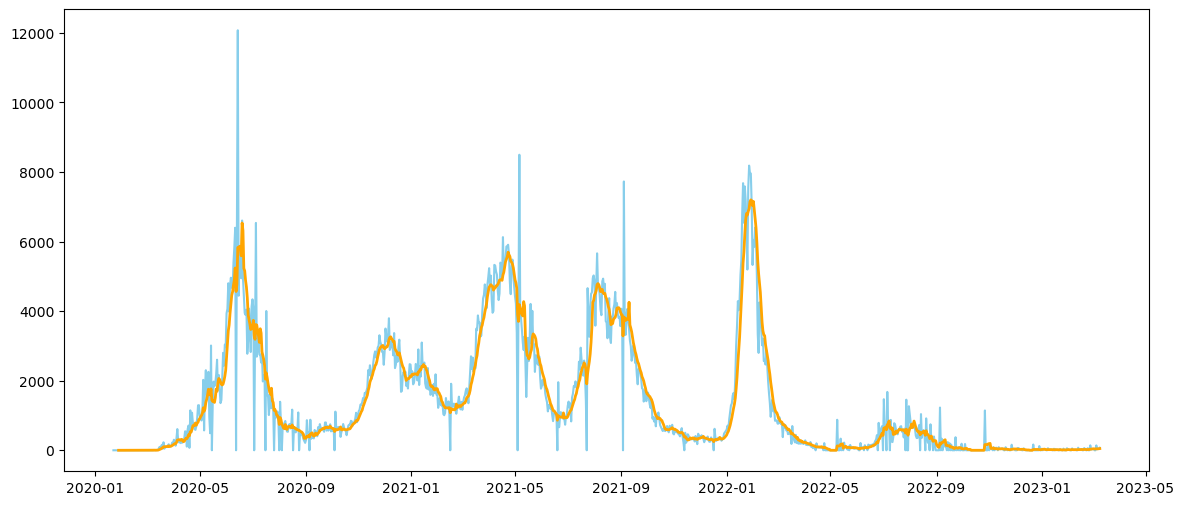

In [19]:
# Plot daily cases and 7-day average
plt.figure(figsize=(14, 6))
plt.plot(pakistan_df.index, pakistan_df['Daily Cases'], label='Daily New Cases', color='skyblue')
plt.plot(pakistan_df.index, pakistan_df['7-Day Avg'], label='7-Day Rolling Avg', color='orange', linewidth=2)


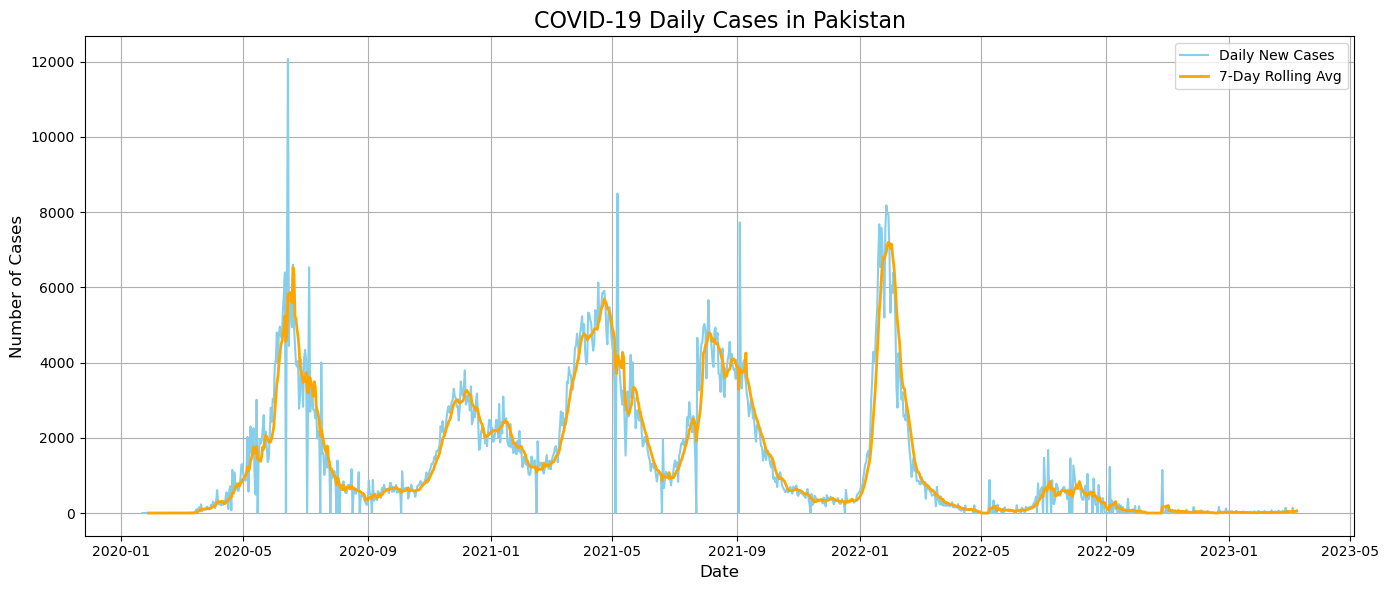

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot daily new cases with label
plt.plot(
    pakistan_df.index,
    pakistan_df['Daily Cases'],
    color='skyblue',
    label='Daily New Cases'
)

# Plot 7-day average with label
plt.plot(
    pakistan_df.index,
    pakistan_df['7-Day Avg'],
    color='orange',
    linewidth=2,
    label='7-Day Rolling Avg'
)

# Add title and labels
plt.title('COVID-19 Daily Cases in Pakistan', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.grid(True)

# ✅ Show the legend (labels now work!)
plt.legend()

# Clean layout
plt.tight_layout()
plt.show()


In [10]:
# Save the plot to file
plt.savefig("pakistan_covid19_daily_cases.png")


<Figure size 640x480 with 0 Axes>

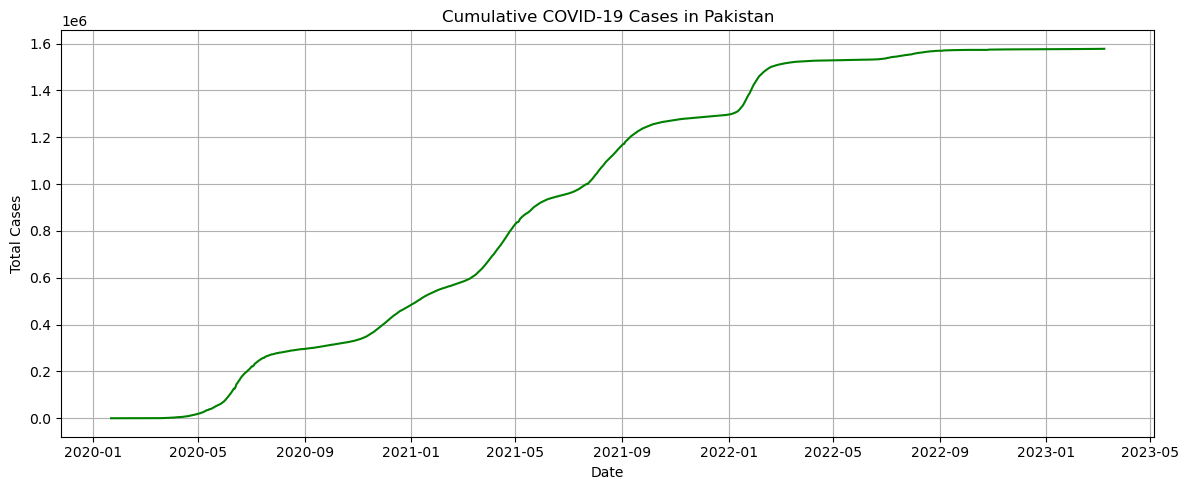

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(pakistan_df.index, pakistan_df['Cumulative Cases'], color='green')
plt.title('Cumulative COVID-19 Cases in Pakistan')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()


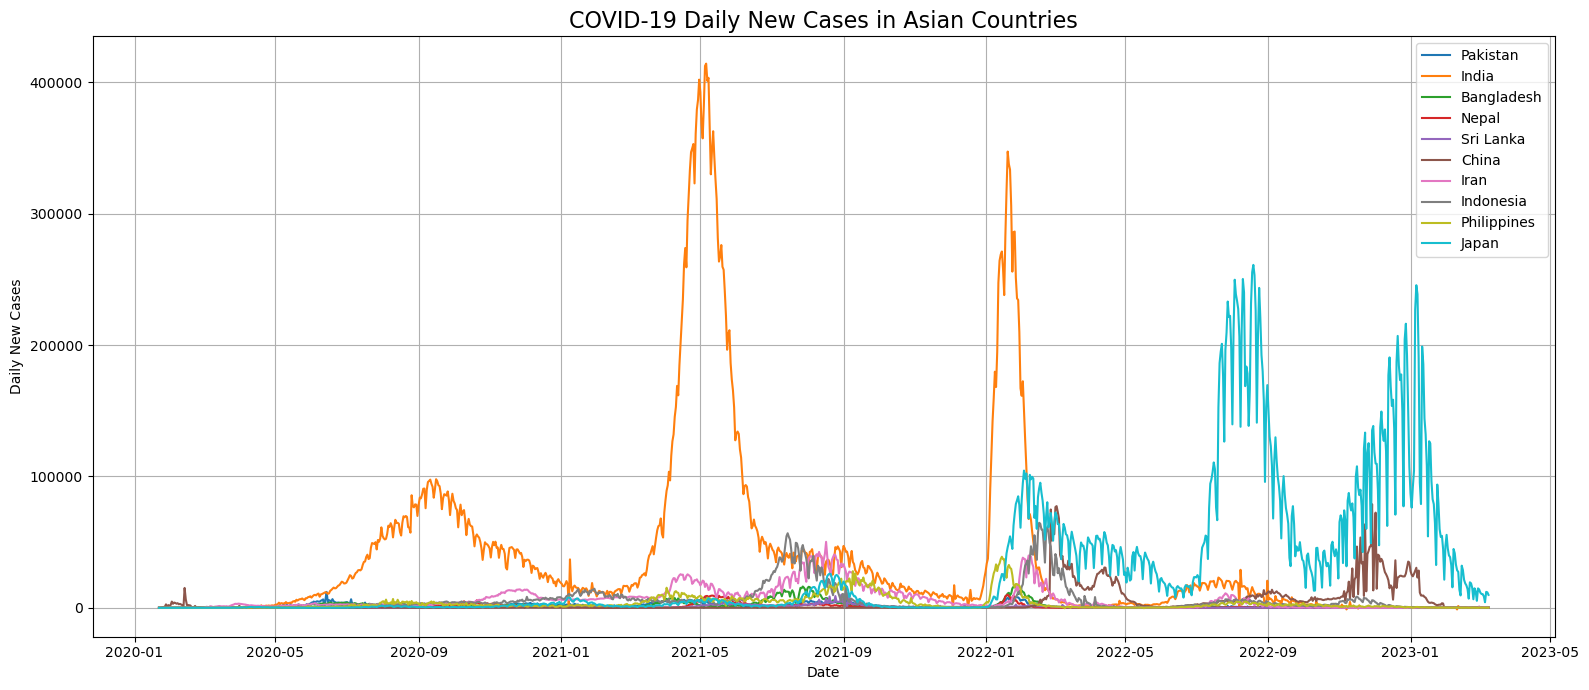

In [25]:
# List of Asian countries to compare
asian_countries = ['Pakistan', 'India', 'Bangladesh', 'Nepal', 'Sri Lanka',
                   'China', 'Iran', 'Indonesia', 'Philippines', 'Japan']

# Filter data for these countries
asian_df = df[df['Country/Region'].isin(asian_countries)]

# Drop extra columns
asian_df = asian_df.drop(['Province/State', 'Lat', 'Long'], axis=1)

# Group by country and sum all provinces
asian_df = asian_df.groupby('Country/Region').sum()

# Transpose so that dates become index
asian_df = asian_df.T

# Convert index to datetime
asian_df.index = pd.to_datetime(asian_df.index, format="%m/%d/%y")
plt.figure(figsize=(16, 7))

for country in asian_countries:
    plt.plot(asian_daily_df.index, asian_daily_df[country], label=country)

plt.title("COVID-19 Daily New Cases in Asian Countries", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate daily new cases for each country
asian_daily_df = asian_df.diff().fillna(0)


<Axes: >

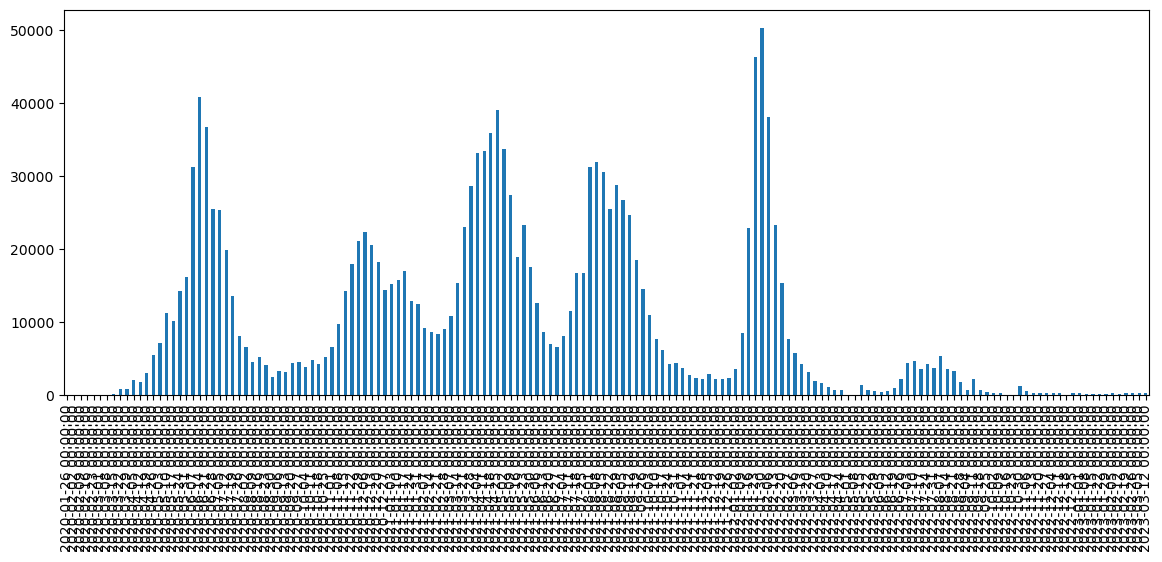

In [23]:
weekly = pakistan_df['Daily Cases'].resample('W').sum()
weekly.plot(kind='bar', figsize=(14, 5))
